<a href="https://colab.research.google.com/github/SaashaJoshi/Pancreas-Cancer/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from glob import glob

data_path = 'drive/My Drive/pancreas_data_original/train_images'
output_path = working_path = 'drive/My Drive/'
g = glob(data_path + '/*.png')

# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:5]))

Total of 39 images.
First 5 filenames:
drive/My Drive/pancreas_data_original/train_images/000149.png
drive/My Drive/pancreas_data_original/train_images/000150.png
drive/My Drive/pancreas_data_original/train_images/000148.png
drive/My Drive/pancreas_data_original/train_images/000145.png
drive/My Drive/pancreas_data_original/train_images/000143.png


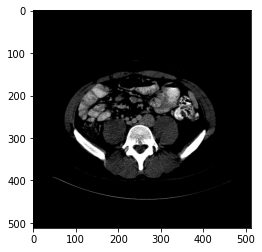

786432
(512, 512, 3)
512 512 3


In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('drive/My Drive/pancreas_data_original/train_images/000148.png')
plt.imshow(img)
plt.show()

print(img.size)    # (512, 512, 3)
print(img.shape)

w, h, channels = img.shape
print(w, h, channels)

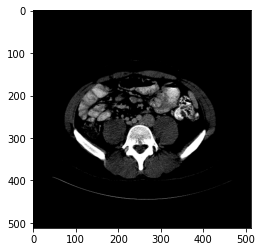

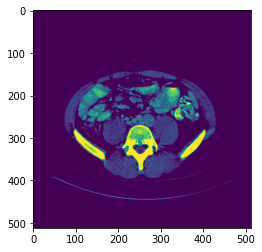

In [0]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(img_rgb)
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.imshow(img_gray)
plt.show()

In [0]:
# Flatten / Reshape image
img2 = img.reshape((-1, 3))
print(img2.shape)    # (512, 512, 3) to (262144, 3)

(262144, 3)


In [0]:
#  Convert to float32 image
img2 = np.float32(img2)

#  Criteria (Stops at maximun iteration and epochs)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2   # No. of Clusters
attempts = 10
ret,label,center=cv2.kmeans(img2, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)    # or use cv2.KMEANS_PP_CENTERS

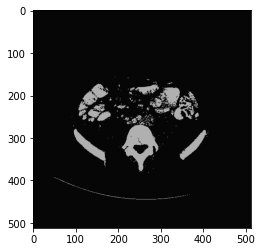

In [0]:
# Center of clusters
center = np.uint8(center)

segmented_img = center[label.flatten()]
segmented_img = segmented_img.reshape((img.shape))    # Reshape to original image

plt.imshow(segmented_img)
plt.show()

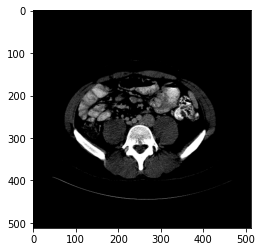

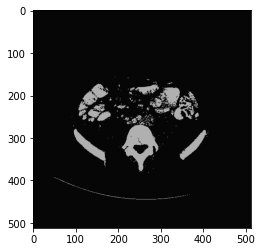

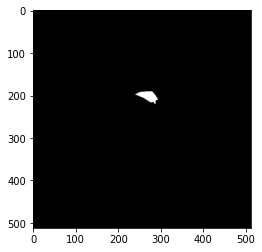

In [0]:
cv2.imwrite('drive/My Drive/pancreas_data_original/output_000101.png', segmented_img)
output_img = cv2.imread('drive/My Drive/pancreas_data_original/output_000101.png')

g_truth = cv2.imread('drive/My Drive/pancreas_data_original/train_masks/000148.png')

plt.imshow(img_rgb)
plt.show()

plt.imshow(output_img)
plt.show()

plt.imshow(g_truth)
plt.show()

In [0]:
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))

# color (i.e cluster) to disable
cluster = 1
masked_image[label == cluster] = [0, 0, 0]
# print(masked_image[cluster])
masked_image = masked_image.reshape(img.shape)

plt.imshow(masked_image)
plt.show()

IndexError: ignored